# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #print (cities)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [132]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = 1.8 * (city_weather["main"]["temp_max"] - 273) + 32
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | saleaula
City not found. Skipping...
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | gorontalo
Processing Record 6 of Set 1 | komsomolskiy
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | buta
Processing Record 9 of Set 1 | lovozero
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | guacimo
Processing Record 12 of Set 1 | tazovskiy
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | merzifon
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | sao joao da barra
Processing Record 22 of Set 1 | illoqq

Processing Record 35 of Set 4 | aakirkeby
City not found. Skipping...
Processing Record 36 of Set 4 | kailua
Processing Record 37 of Set 4 | altay
Processing Record 38 of Set 4 | saskylakh
Processing Record 39 of Set 4 | barbar
City not found. Skipping...
Processing Record 40 of Set 4 | nalut
Processing Record 41 of Set 4 | hervey bay
Processing Record 42 of Set 4 | srednekolymsk
Processing Record 43 of Set 4 | borogontsy
Processing Record 44 of Set 4 | tarrafal
Processing Record 45 of Set 4 | turukhansk
Processing Record 46 of Set 4 | kloulklubed
Processing Record 47 of Set 4 | port macquarie
Processing Record 48 of Set 4 | rungata
City not found. Skipping...
Processing Record 49 of Set 4 | namatanai
Processing Record 0 of Set 5 | barreirinha
Processing Record 1 of Set 5 | bosaso
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | boa vista
Processing Record 4 of Set 5 | lakhdenpokhya
Processing Record 5 of Set 5 | bolshaya martynovka
Processing Record 6 of Set 5 | 

Processing Record 26 of Set 8 | yamada
Processing Record 27 of Set 8 | buariki
City not found. Skipping...
Processing Record 28 of Set 8 | colares
Processing Record 29 of Set 8 | kadiri
Processing Record 30 of Set 8 | rocha
Processing Record 31 of Set 8 | oriximina
Processing Record 32 of Set 8 | temaraia
City not found. Skipping...
Processing Record 33 of Set 8 | malatya
Processing Record 34 of Set 8 | dicabisagan
Processing Record 35 of Set 8 | vuktyl
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | mehamn
Processing Record 38 of Set 8 | puerto madryn
Processing Record 39 of Set 8 | evensk
Processing Record 40 of Set 8 | davila
Processing Record 41 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 42 of Set 8 | amarkantak
Processing Record 43 of Set 8 | walvis bay
Processing Record 44 of Set 8 | blagoveshchenka
Processing Record 45 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 8 | lazaro cardenas
Processing Record 

Processing Record 14 of Set 12 | lata
Processing Record 15 of Set 12 | patterson
Processing Record 16 of Set 12 | velyka mykhaylivka
Processing Record 17 of Set 12 | hokitika
Processing Record 18 of Set 12 | wanning
Processing Record 19 of Set 12 | lolua
City not found. Skipping...
Processing Record 20 of Set 12 | fort nelson
Processing Record 21 of Set 12 | katangli
Processing Record 22 of Set 12 | kesova gora
Processing Record 23 of Set 12 | laguna
Processing Record 24 of Set 12 | carnduff
Processing Record 25 of Set 12 | san jose
Processing Record 26 of Set 12 | soyo
Processing Record 27 of Set 12 | rochegda
Processing Record 28 of Set 12 | mantua
Processing Record 29 of Set 12 | karamea
City not found. Skipping...
Processing Record 30 of Set 12 | mouzouras
Processing Record 31 of Set 12 | ereymentau
Processing Record 32 of Set 12 | mananara
Processing Record 33 of Set 12 | artesia
Processing Record 34 of Set 12 | baruun-urt
Processing Record 35 of Set 12 | high level
Processing Rec

In [133]:
# Convert the cities weather data into a Pandas DataFrame
citydatadf = pd.DataFrame(city_data)

# Show Record Count
citydatadf.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [134]:
# Display sample data
citydatadf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,59.072,61,75,3.94,NZ,1680480485
1,east london,-33.0153,27.9116,73.472,70,100,1.37,ZA,1680480485
2,thompson,55.7435,-97.8558,11.516,86,100,3.95,CA,1680480486
3,gorontalo,0.5412,123.0595,79.682,84,95,1.07,ID,1680480486
4,komsomolskiy,40.4272,71.7189,52.790,82,97,3.09,UZ,1680480693


In [135]:
# Export the City_Data into a csv
citydatadf.to_csv("../Output_data/cities.csv", index_label="City_ID")

In [136]:
# Read saved data
citydatadf = pd.read_csv("../Output_data/cities.csv", index_col="City_ID")

# Display sample data
citydatadf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,59.072,61,75,3.94,NZ,1680480485
1,east london,-33.0153,27.9116,73.472,70,100,1.37,ZA,1680480485
2,thompson,55.7435,-97.8558,11.516,86,100,3.95,CA,1680480486
3,gorontalo,0.5412,123.0595,79.682,84,95,1.07,ID,1680480486
4,komsomolskiy,40.4272,71.7189,52.790,82,97,3.09,UZ,1680480693


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

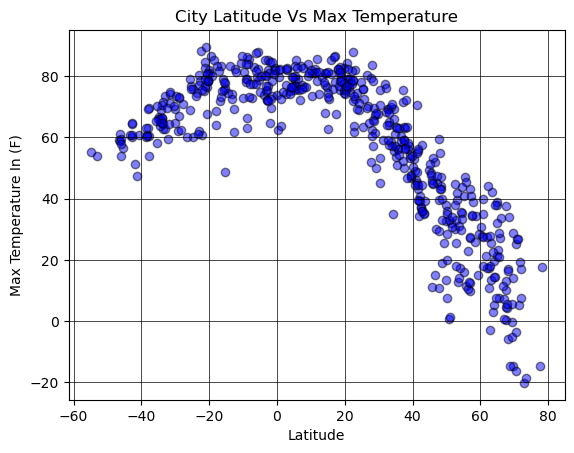

In [137]:
# Build scatter plot for latitude vs. temperature
plt.scatter(pd.to_numeric(citydatadf["Lat"]).astype(float), pd.to_numeric(citydatadf["Max Temp"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature In (F)")
plt.title(f"City Latitude Vs Max Temperature")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
# Save the figure
plt.savefig("../Output_data/LatvsTemp.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

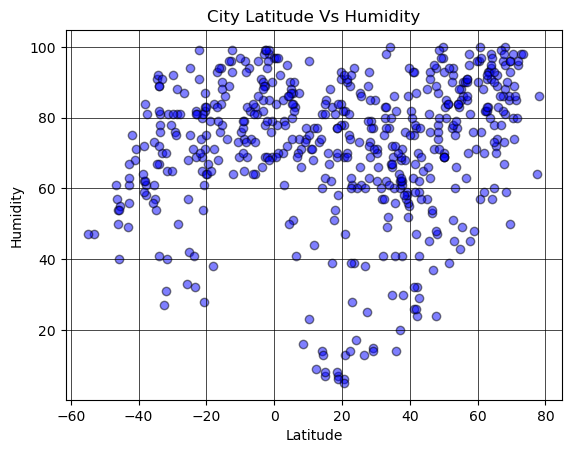

In [138]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(pd.to_numeric(citydatadf["Lat"]).astype(float), pd.to_numeric(citydatadf["Humidity"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude Vs Humidity")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
# Save the figure
plt.savefig("../output_data/LatvsHumidity.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

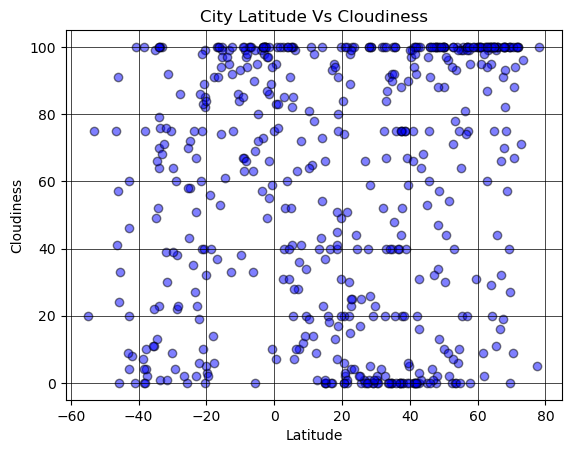

In [139]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(pd.to_numeric(citydatadf["Lat"]).astype(float), pd.to_numeric(citydatadf["Cloudiness"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude Vs Cloudiness")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
# Save the figure
plt.savefig("../output_data/LatvsCloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

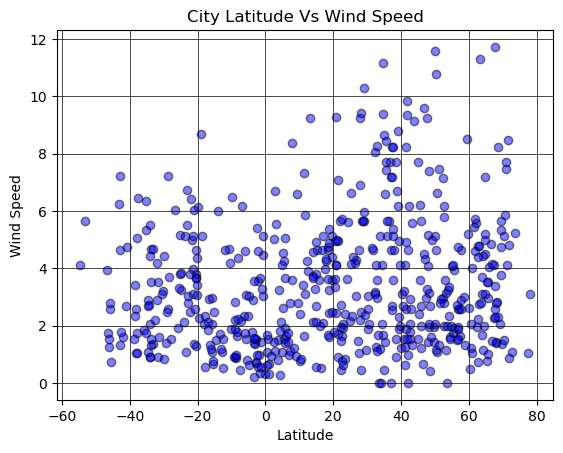

In [140]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(pd.to_numeric(citydatadf["Lat"]).astype(float), pd.to_numeric(citydatadf["Wind Speed"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude Vs Wind Speed")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
# Save the figure
plt.savefig("../output_data/LatvsWindSpeed.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [141]:
# Define a function to create Linear Regression plots
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northerndf = citydatadf.loc[pd.to_numeric(citydatadf["Lat"]) >= 0, :]
# Display sample data
northerndf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,thompson,55.7435,-97.8558,11.516,86,100,3.95,CA,1680480486
3,gorontalo,0.5412,123.0595,79.682,84,95,1.07,ID,1680480486
4,komsomolskiy,40.4272,71.7189,52.790,82,97,3.09,UZ,1680480693
6,buta,2.7858,24.7300,74.066,79,85,1.13,CD,1680480694
7,lovozero,68.0050,35.0117,4.280,100,82,1.44,RU,1680480924


In [142]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southerndf = citydatadf.loc[pd.to_numeric(citydatadf["Lat"]) < 0, :]
# Display sample data
southerndf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,59.072,61,75,3.94,NZ,1680480485
1,east london,-33.0153,27.9116,73.472,70,100,1.37,ZA,1680480485
5,punta arenas,-53.1500,-70.9167,53.978,47,75,5.66,CL,1680480515
8,bredasdorp,-34.5322,20.0403,64.958,91,13,2.67,ZA,1680480924
14,new norfolk,-42.7826,147.0587,64.184,61,46,1.34,AU,1680480925


In [211]:
x1_values = pd.to_numeric(northerndf['Lat'])
y1_values = pd.to_numeric(northerndf['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y1_values)
regress_values = x1_values * slope + intercept
Line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8994149197664563
The Line of equation is: y = -1.16x + 94.43


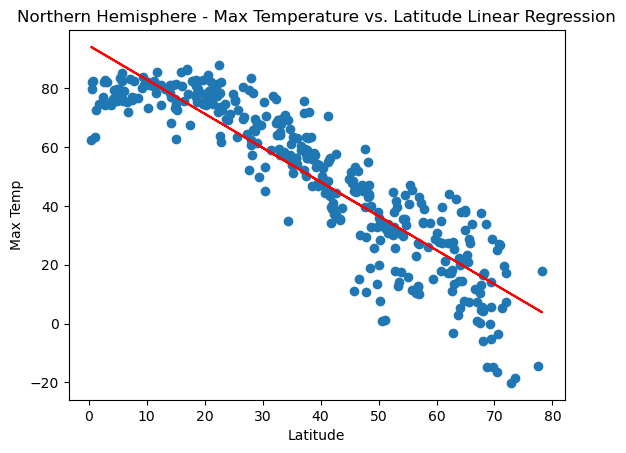

In [212]:
# Linear regression on Northern Hemisphere
plt.scatter(x1_values,y1_values)
plt.plot(x1_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temperature vs. Latitude Linear Regression')
print ("The r-value is: " + str(rvalue))
print ("The Line of equation is: " + Line_eq1)
plt.savefig("../Output_data/LatvsTempLinearRegressionNorth.png")
plt.show()

In [213]:
x2_values = pd.to_numeric(southerndf['Lat'])
y2_values = pd.to_numeric(southerndf['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y2_values)
regress_values = x2_values * slope + intercept
Line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.6964807818169783
The Line of equation is: y = 0.46x + 82.14


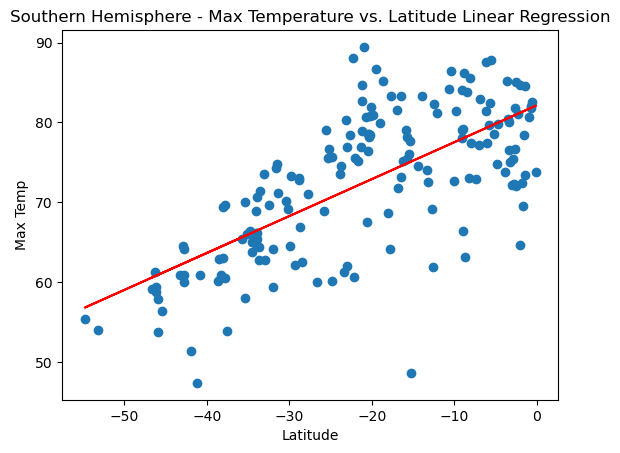

In [214]:
# Linear regression on Southern Hemisphere
plt.scatter(x2_values,y2_values)
plt.plot(x2_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude Linear Regression')
print ("The r-value is: " + str(rvalue))
print ("The Line of equation is: " + Line_eq2)
plt.savefig("../Output_data/LatvsTempLinearRegressionSouth.png")
plt.show()

**Discussion about the linear relationship:** The Linear relationship shows that in the Northern Hemisphere as you go further away the temperature gets colder.  While in the Southern Hemisphere as you get closer the temperature gets hotter.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.26075977446529225
The Line of equation is: y = 0.28x + 60.11


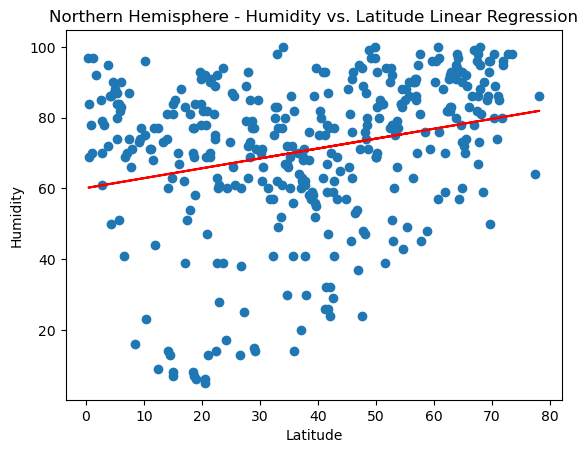

In [215]:
# Northern Hemisphere
x3_values = pd.to_numeric(northerndf['Lat'])
y3_values = pd.to_numeric(northerndf['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x3_values, y3_values)
regress_values = x3_values * slope + intercept
Line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x3_values,y3_values)
plt.plot(x3_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print ("The r-value is: " + str(rvalue))
print ("The Line of equation is: " + Line_eq3)
plt.savefig("../Output_data/LatvsHumidityLinearRegressionNorth.png")
plt.show()

The r-value is: 0.49864567179349367
The Line of equation is: y = 0.58x + 86.31


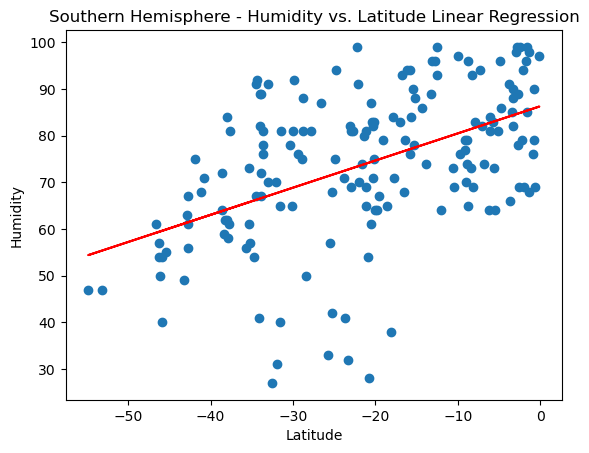

In [216]:
# Southern Hemisphere
x4_values = pd.to_numeric(southerndf['Lat'])
y4_values = pd.to_numeric(southerndf['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x4_values, y4_values)
regress_values = x4_values * slope + intercept
Line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x4_values,y4_values)
plt.plot(x4_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print ("The r-value is: " + str(rvalue))
print ("The Line of equation is: " + Line_eq4)
plt.savefig("../Output_data/LatvsHumidityLinearRegressionSouth.png")
plt.show()

**Discussion about the linear relationship:** There is no real relationship between the humidity and latitude in both the Southern & Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25645271108500783
The Line of equation is: y = 0.5x + 36.88


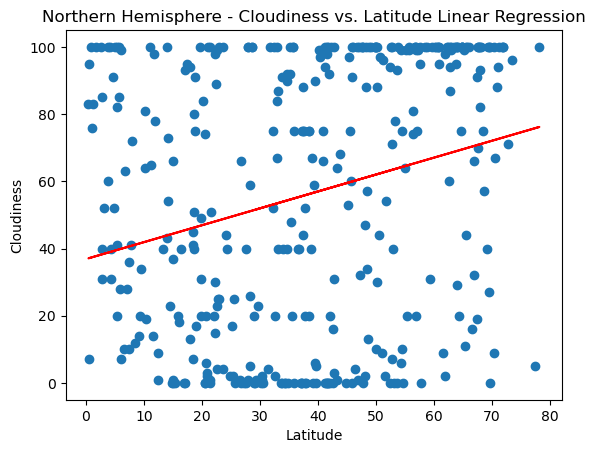

In [217]:
# Northern Hemisphere
x5_values = pd.to_numeric(northerndf['Lat'])
y5_values = pd.to_numeric(northerndf['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x5_values, y5_values)
regress_values = x5_values * slope + intercept
Line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x5_values,y5_values)
plt.plot(x5_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print ("The r-value is: " + str(rvalue))
print ("The Line of equation is: " + Line_eq5)
plt.savefig("../Output_data/LatvsCloudinessLinearRegressionNorth.png")
plt.show()

The r-value is: 0.4649055643637012
The Line of equation is: y = 1.18x + 85.52


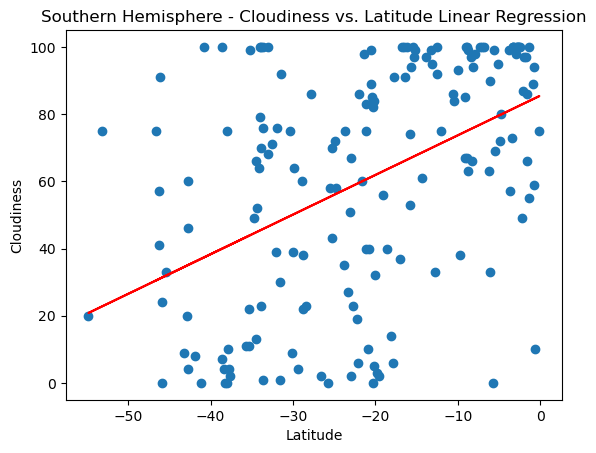

In [218]:
# Southern Hemisphere
x6_values = pd.to_numeric(southerndf['Lat'])
y6_values = pd.to_numeric(southerndf['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x6_values, y6_values)
regress_values = x6_values * slope + intercept
Line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x6_values,y6_values)
plt.plot(x6_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print ("The r-value is: " + str(rvalue))
print ("The Line of equation is: " + Line_eq6)
plt.show()

**Discussion about the linear relationship:** There is no real relationship between the cloudiness and latitude in both the Southern & Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08718751465656162
The Line of equation is: y = 0.01x + 3.24


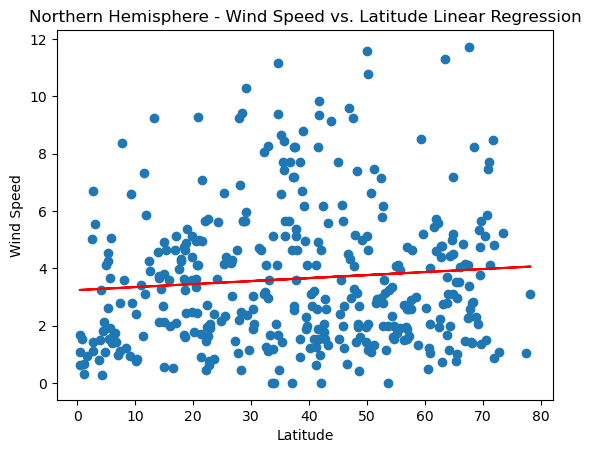

In [219]:
# Northern Hemisphere
x7_values = pd.to_numeric(northerndf['Lat'])
y7_values = pd.to_numeric(northerndf['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x7_values, y7_values)
regress_values = x7_values * slope + intercept
Line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x7_values,y7_values)
plt.plot(x7_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print ("The r-value is: " + str(rvalue))
print ("The Line of equation is: " + Line_eq7)
plt.savefig("../Output_data/LatvsWindSpeedLinearRegressionNorth.png")
plt.show()

The r-value is: -0.19042529889602464
The Line of equation is: y = -0.02x + 2.33


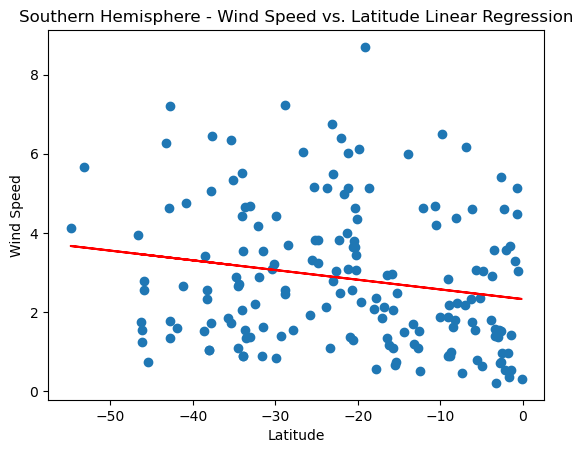

In [220]:
# Southern Hemisphere
x8_values = pd.to_numeric(southerndf['Lat'])
y8_values = pd.to_numeric(southerndf['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x8_values, y8_values)
regress_values = x8_values * slope + intercept
Line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x8_values,y8_values)
plt.plot(x8_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print ("The r-value is: " + str(rvalue))
print ("The Line of equation is: " + Line_eq8)
plt.savefig("../Output_data/LatvsWindSpeedLinearRegressionSouth.png")
plt.show()

**Discussion about the linear relationship:** There is no real relationship between the wind speed and latitude in both the Southern & Northern Hemisphere.